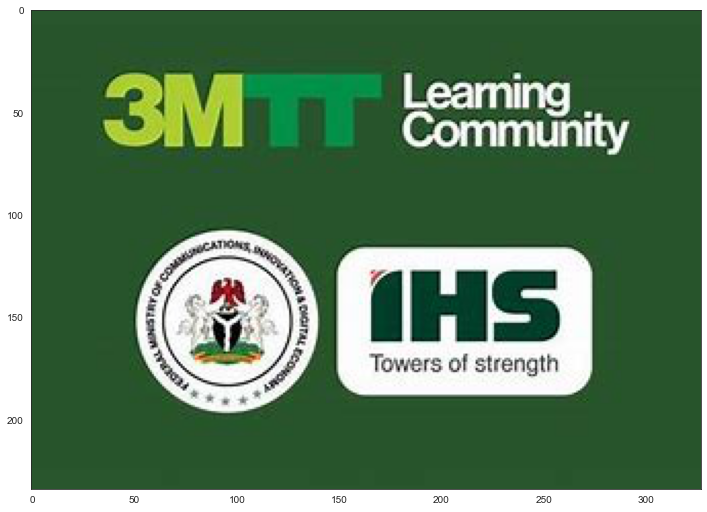

In [2]:
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\lilnu\Downloads\OIP (1).jpeg")
plt.figure(figsize=(12,10))
sns.set_style("white")
plt.imshow(img)
plt.show()

# HELLO AND WELCOME TO OUR HACKATHON PROJECT

## Project Topic: JAMB Score Prediction Using Three Key Influencing Index

###   1.Study Hour
###   2.Attendance Rate
###   3.Distance from Home to School

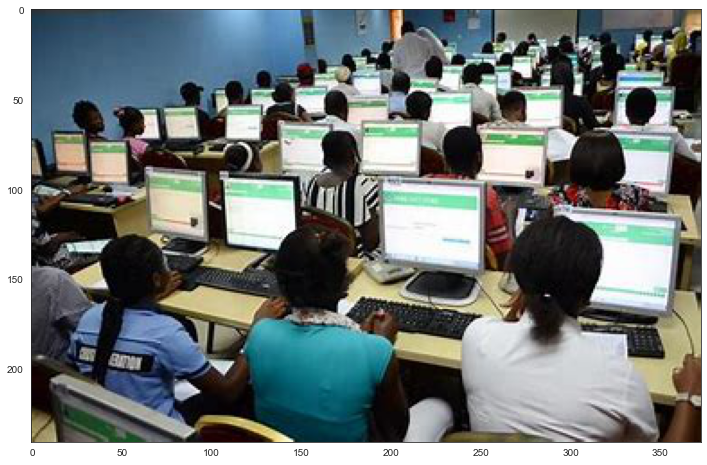

In [3]:
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\lilnu\Downloads\download (16).jpeg")
plt.figure(figsize=(12,10))
sns.set_style("white")
plt.imshow(img)
plt.show()

## *MEET THE FELLOWS* 

In [5]:
Our_Details = {"NAME": ["ABDULWAHAB NUHU","WASIA BABA MUSA","RABI'A HUDU ABUBAKAR"],
               "GENDER": ["Male","Female","Female"],
               "FELLOW ID": ["FE/23/33870000", "FE/23/49076530", "FE/23/84360228"],
               "LEARNING TRACK": ["Data Science", "Data Science", "Data Science"],    
               "ALC": ["ECM HUB", "ECM HUB", "ECM HUB"],
               "COHORT": [2,2,2],
               "STATE": ["Kano", "Kano", "Kano"]}

In [6]:
Our_Details = pd.DataFrame(Our_Details)
Our_Details

,NAME,GENDER,FELLOW ID,LEARNING TRACK,ALC,COHORT,STATE
0,ABDULWAHAB NUHU,Male,FE/23/33870000,Data Science,ECM HUB,2,Kano
1,WASIA BABA MUSA,Female,FE/23/49076530,Data Science,ECM HUB,2,Kano
2,RABI'A HUDU ABUBAKAR,Female,FE/23/84360228,Data Science,ECM HUB,2,Kano


# ---------------------------------------------------------------------------------------------------------

## Part 1 (Data Importing and Description)

### Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Loading Data

In [6]:
data = pd.read_csv(r"C:\Users\lilnu\Downloads\Datasets\jamb_exam_results.csv")
data

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


### Data Inspection/ Cleaning

In [7]:
data.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [8]:
data.isnull().sum()

JAMB_Score                      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Teacher_Quality                 0
Distance_To_School              0
School_Type                     0
School_Location                 0
Extra_Tutorials                 0
Access_To_Learning_Materials    0
Parent_Involvement              0
IT_Knowledge                    0
Student_ID                      0
Age                             0
Gender                          0
Socioeconomic_Status            0
Parent_Education_Level          0
Assignments_Completed           0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(5000, 17)

In [11]:
data.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


## Part 2 (Data Sorting and Visualization)

### Data Sorting

In [12]:
sorted_data=data.sort_values(by = "JAMB_Score",ascending = False, ignore_index = True)
sorted_data

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,367,40,84,4,2.0,Public,Urban,Yes,Yes,Medium,Medium,2875,19,Female,Medium,Secondary,5
1,367,35,100,3,15.1,Private,Urban,Yes,Yes,Low,High,1587,18,Female,High,Secondary,4
2,367,28,89,3,5.0,Public,Rural,No,No,Medium,Medium,4191,17,Female,Medium,Tertiary,1
3,366,40,91,2,9.7,Private,Urban,Yes,No,High,Medium,1542,20,Male,Medium,Secondary,3
4,362,40,98,4,11.0,Public,Urban,Yes,Yes,High,Medium,3729,19,Male,High,Secondary,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,100,10,71,2,14.3,Public,Urban,No,No,Low,Low,4059,21,Male,Medium,Secondary,1
4996,100,14,81,1,7.2,Public,Urban,No,No,Low,Low,55,15,Male,Medium,Primary,3
4997,100,13,83,3,6.0,Public,Urban,No,No,Low,Medium,2921,18,Male,Medium,Secondary,1
4998,100,15,88,4,10.5,Public,Urban,No,No,Low,Low,3296,21,Male,Medium,Tertiary,1


In [13]:
Top = sorted_data.head(20)
Top

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,367,40,84,4,2.0,Public,Urban,Yes,Yes,Medium,Medium,2875,19,Female,Medium,Secondary,5
1,367,35,100,3,15.1,Private,Urban,Yes,Yes,Low,High,1587,18,Female,High,Secondary,4
2,367,28,89,3,5.0,Public,Rural,No,No,Medium,Medium,4191,17,Female,Medium,Tertiary,1
3,366,40,91,2,9.7,Private,Urban,Yes,No,High,Medium,1542,20,Male,Medium,Secondary,3
4,362,40,98,4,11.0,Public,Urban,Yes,Yes,High,Medium,3729,19,Male,High,Secondary,5
5,360,33,76,4,6.5,Private,Rural,Yes,Yes,High,Medium,1392,17,Male,High,Tertiary,4
6,359,37,100,5,11.5,Public,Urban,No,Yes,Medium,High,1770,18,Female,High,Tertiary,5
7,355,38,93,3,11.7,Private,Rural,Yes,Yes,High,High,4422,21,Male,High,Secondary,4
8,346,35,97,3,11.9,Public,Urban,Yes,Yes,Low,Low,1323,17,Male,Medium,Secondary,4
9,343,27,100,4,5.2,Public,Urban,Yes,Yes,High,High,1591,15,Male,High,Tertiary,2


In [14]:
last = sorted_data.tail(20)
last

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
4980,100,18,83,3,13.6,Public,Rural,No,Yes,Low,High,42,22,Male,Medium,Primary,1
4981,100,6,99,3,12.7,Public,Rural,No,No,Low,High,4147,19,Female,Medium,Primary,1
4982,100,23,87,3,14.3,Public,Rural,Yes,No,Medium,Medium,875,16,Female,Low,Secondary,1
4983,100,6,81,3,7.3,Public,Rural,No,Yes,Medium,Low,4378,17,Male,Low,Primary,1
4984,100,9,64,3,12.0,Public,Rural,Yes,Yes,Low,Low,107,18,Female,Low,None,1
4985,100,18,79,1,4.7,Public,Rural,No,Yes,Medium,Low,4133,19,Female,Low,Secondary,3
4986,100,24,74,2,11.6,Public,Rural,No,Yes,Low,Medium,2289,15,Female,Medium,Secondary,2
4987,100,0,72,2,0.7,Public,Urban,Yes,No,Medium,High,4054,21,Male,Medium,Secondary,1
4988,100,22,71,3,13.3,Private,Urban,No,Yes,Low,Medium,3410,21,Female,Low,Primary,1
4989,100,18,86,1,20.0,Public,Urban,Yes,No,Low,Low,4414,18,Female,Low,None,2


### Visualization of The Top 20(Green Dots) and the Last 20(Red Dots) students according to their Study Hours per Week

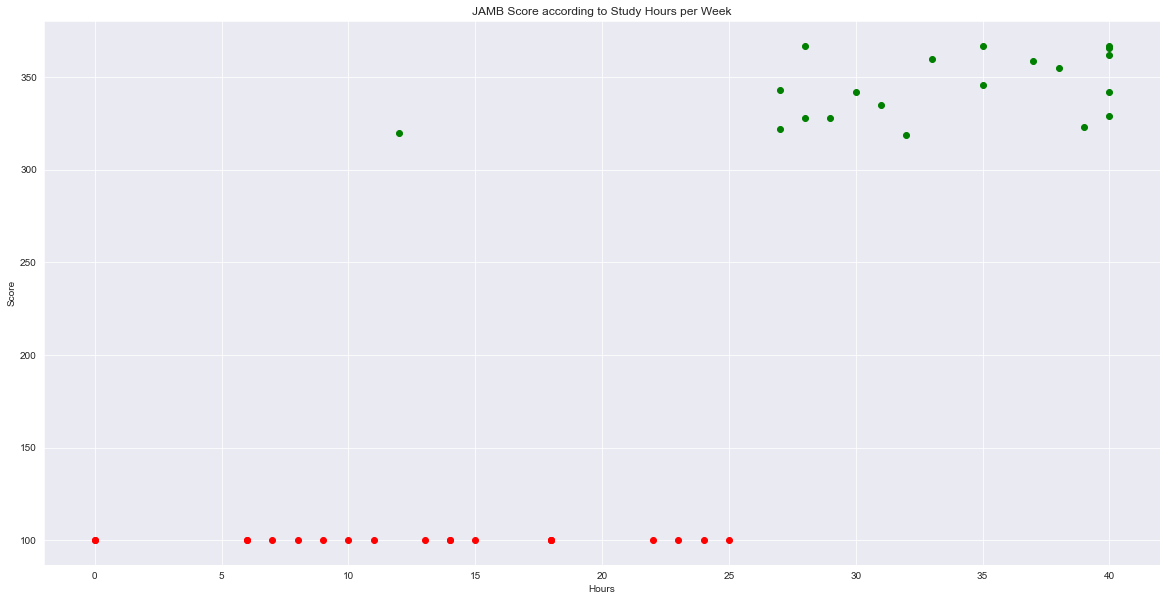

In [15]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("JAMB Score according to Study Hours per Week")
plt.xlabel("Hours")
plt.ylabel("Score")

plt.scatter(Top["Study_Hours_Per_Week"],Top["JAMB_Score"],color="green")
plt.scatter(last["Study_Hours_Per_Week"],last["JAMB_Score"],color="red")

### Visualization of The Top 20(Green Dots) and the Last 20(Red Dots) students according to their Attendance Rate

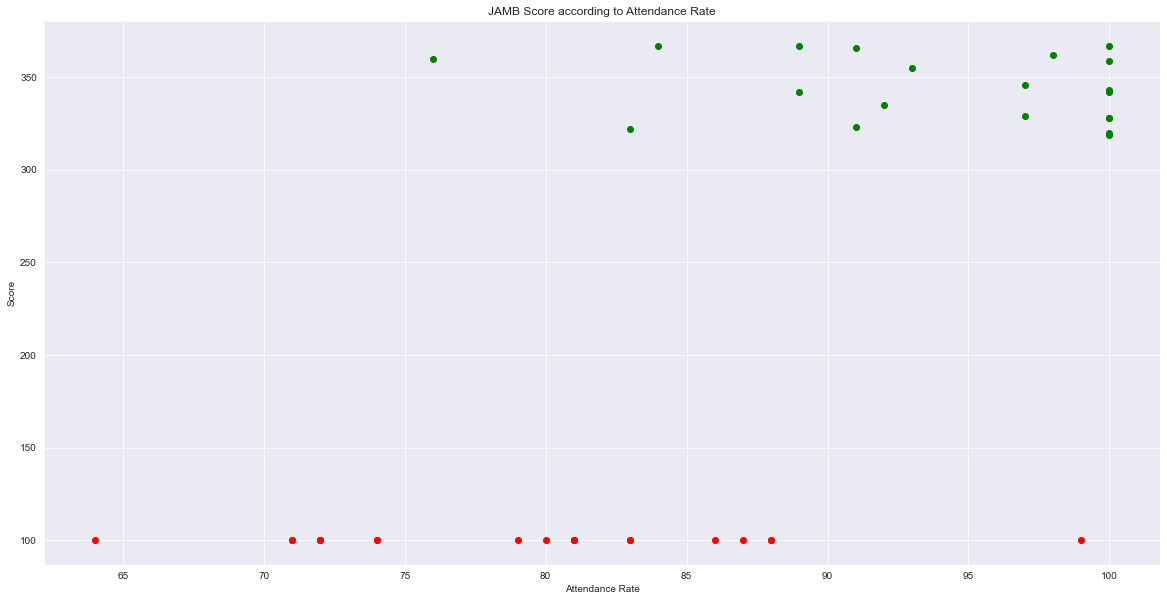

In [16]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("JAMB Score according to Attendance Rate")
plt.xlabel("Attendance Rate")
plt.ylabel("Score")

plt.scatter(Top["Attendance_Rate"],Top["JAMB_Score"],color="green")
plt.scatter(last["Attendance_Rate"],last["JAMB_Score"],color="red")

### Visualization of The Top 20(Green Dots) and the Last 20(Red Dots) students according to their Distance From Home to School

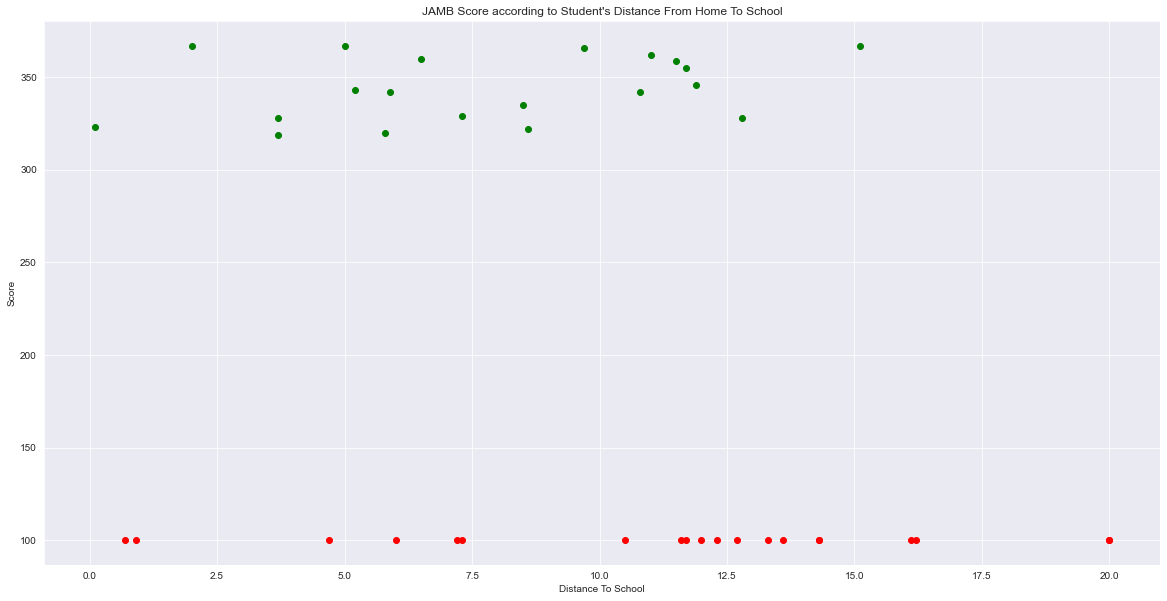

In [17]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("JAMB Score according to Student's Distance From Home To School")
plt.xlabel("Distance To School")
plt.ylabel("Score")

plt.scatter(Top["Distance_To_School"],Top["JAMB_Score"],color="green")
plt.scatter(last["Distance_To_School"],last["JAMB_Score"],color="red")

### Visualization of Success Rate according to Parental Involvement in Ward's Education

In [18]:
avg_pi_top = Top.groupby("Parent_Involvement")["JAMB_Score"].count()
avg_pi_top

Parent_Involvement
High      8
Low       5
Medium    7
Name: JAMB_Score, dtype: int64

In [19]:
avg_pi_last = last.groupby("Parent_Involvement")["JAMB_Score"].count()
avg_pi_last

Parent_Involvement
High       1
Low       12
Medium     7
Name: JAMB_Score, dtype: int64

Text(0.5, 1.0, "Last 20 Student's Parental Involvement in Education")

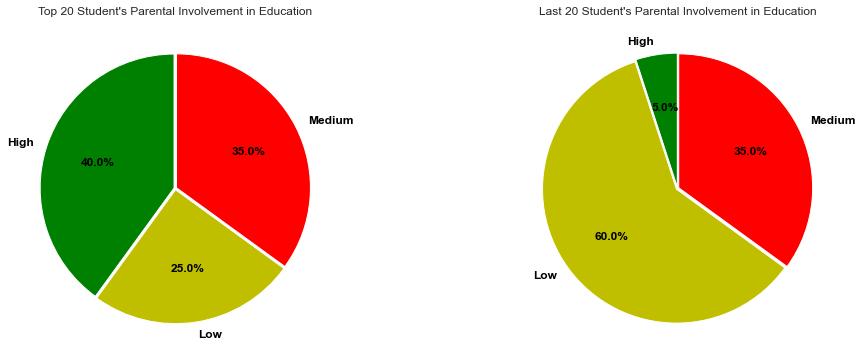

In [20]:
fig, axes = plt.subplots(1,2, figsize= (15,12))
plt.subplots_adjust(wspace=0.5)

axes[0].pie(avg_pi_top, 
            labels =["High","Low","Medium"],
            colors =["g","y","r"],
            startangle = 90,
            explode = (0.01,0.01,0.01),
            autopct = ("%1.1f%%"),
             textprops = {"color":"black","fontsize":12,"fontweight": "bold"})
axes[0].set_title("Top 20 Student's Parental Involvement in Education")


axes[1].pie(avg_pi_last,
            labels =["High","Low","Medium"],
            colors =["g","y","r"],
            startangle = 90,
            explode = (0.01,0.01,0.01),
            autopct = ("%1.1f%%"),
             textprops = {"color":"black","fontsize":12,"fontweight": "bold"})
axes[1].set_title("Last 20 Student's Parental Involvement in Education")



### Visualization of Success Rate according to Student's IT Knowledge

In [21]:
avg_it_top = Top.groupby("IT_Knowledge")["JAMB_Score"].count()
avg_it_top

IT_Knowledge
High       8
Low        1
Medium    11
Name: JAMB_Score, dtype: int64

In [22]:
avg_it_last = last.groupby("IT_Knowledge")["JAMB_Score"].count()
avg_it_last

IT_Knowledge
High      4
Low       9
Medium    7
Name: JAMB_Score, dtype: int64

Text(0.5, 1.0, "Last 20 Student's IT Knowledge")

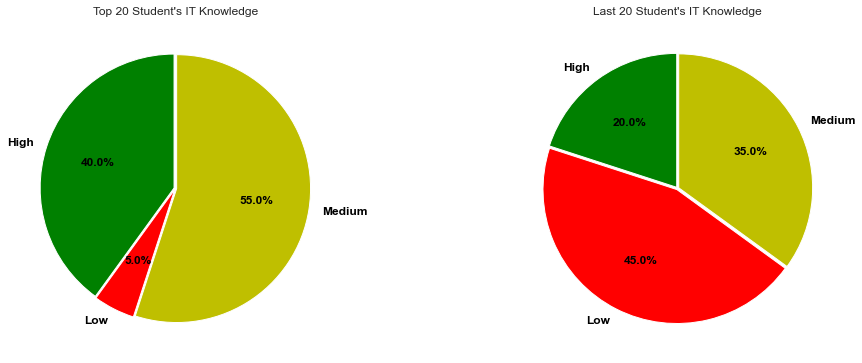

In [23]:
fig, axes = plt.subplots(1,2, figsize= (15,12))
plt.subplots_adjust(wspace=0.5)

axes[0].pie(avg_it_top, 
            labels =["High","Low","Medium"],
            colors =["g","r","y"],
            startangle = 90,
            explode = (0.01,0.01,0.01),
            autopct = ("%1.1f%%"),
             textprops = {"color":"black","fontsize":12,"fontweight": "bold"})
axes[0].set_title("Top 20 Student's IT Knowledge")


axes[1].pie(avg_it_last,
            labels =["High","Low","Medium"],
            colors =["g","r","y"],
            startangle = 90,
            explode = (0.01,0.01,0.01),
            autopct = ("%1.1f%%"),
             textprops = {"color":"black","fontsize":12,"fontweight": "bold"})
axes[1].set_title("Last 20 Student's IT Knowledge")


## Part 3 (Data Splitting and Modelling)

### Prepare & Split Data for Modelling

In [24]:
x = data[["Study_Hours_Per_Week","Attendance_Rate","Distance_To_School"]]
y = data[["JAMB_Score"]] 

In [25]:
x

,Study_Hours_Per_Week,Attendance_Rate,Distance_To_School
0,22,78,12.4
1,14,88,2.7
2,29,87,9.6
3,29,99,2.6
4,12,98,8.8
...,...,...,...
4995,20,74,10.6
4996,0,80,20.0
4997,17,89,11.3
4998,15,96,15.9


In [26]:
y

,JAMB_Score
0,192
1,207
2,182
3,210
4,199
...,...
4995,183
4996,179
4997,261
4998,183


### Build Model

In [27]:
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

### Test the Model

#### Test 1

In [37]:
prediction_1 = model.predict([ [50,90,20]  ])


print("Abubakar wrote the JAMB Examination, He studied for 50 hours every week," 
       "He has an attendance rate of 90% and He lives 20km away from the school. Abubakar's JAMB Score is"," ",prediction_1)

Abubakar wrote the JAMB Examination, He studied for 50 hours every week,He has an attendance rate of 90% and He lives 20km away from the school. Abubakar's JAMB Score is   [244]


#### Test 2

In [38]:
prediction_2 = model.predict([ [40,90,10]  ])

print("Fatima wrote the JAMB Examination, She studied for 40 hours every week," 
       "She has an attendance rate of 90% and She lives 10km away from the school. Fatima's JAMB Score is"," ",prediction_2)

Fatima wrote the JAMB Examination, She studied for 40 hours every week,She has an attendance rate of 90% and She lives 10km away from the school. Fatima's JAMB Score is   [282]


#### Test 3

In [39]:
prediction_3 = model.predict([ [10,60,6]  ])

print("Ibrahim wrote the JAMB Examination, He studied for 10 hours every week," 
       "He has an attendance rate of 60% and He lives 6km away from the school. Ibrahim's JAMB Score is"," ",prediction_3)

Ibrahim wrote the JAMB Examination, He studied for 10 hours every week,He has an attendance rate of 60% and He lives 6km away from the school. Ibrahim's JAMB Score is   [132]


#### Test 4

In [40]:
prediction_4 = model.predict([ [5,70,1]  ])

print("Ladi wrote the JAMB Examination, She studied for 5 hours every week," 
       "She has an attendance rate of 70% and She lives 1km away from the school. Ladi's JAMB Score is"," ",prediction_4)

Ladi wrote the JAMB Examination, She studied for 5 hours every week,She has an attendance rate of 70% and She lives 1km away from the school. Ladi's JAMB Score is   [102]


#### Test 5

In [41]:
prediction_5 = model.predict([ [30,80,1]  ])

print("Hafiz wrote the JAMB Examination, He studied for 30 hours every week," 
       "He has an attendance rate of 80% and He lives 1km away from the school. Hafiz's JAMB Score is"," ",prediction_1)

Hafiz wrote the JAMB Examination, He studied for 30 hours every week,He has an attendance rate of 80% and He lives 1km away from the school. Hafiz's JAMB Score is   [244]


### Model Accuracy Check

In [33]:
y_pred = model.predict(x)
accuracy = accuracy_score(y, y_pred)
accuracy

0.985

In [34]:
accuracy_percentage = accuracy * 100 
print("The Model has an Accuracy of",accuracy_percentage, "%")

The Model has an Accuracy of 98.5 %


### THANK YOU 3MTT FOR THIS GREAT LEARNING OPPORTUNITY AND THANK YOU ALL FOR YOUR TIME